In [211]:
import random
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
    input_size = 30
    input_features = 2
    
    inputs = np.ones((input_size, input_features))
    outputs = np.ones((input_size, 1))
    
    weights = np.random.uniform(-1,2, input_features)
    threshold = np.random.randint(5)
    
    epochs = 1000
    learning_rate = 0.1
    
    def __init__(self):
        self.create_test_data_set()
         
    def create_test_data_set(self):
        for i in range(self.input_size):
            self.inputs[i] = np.random.uniform(0,1, self.input_features)
            self.outputs[i] = self.generate_output(self.inputs[i])
            
            self.outputs[i] = 0 if i%7 == 0 else self.outputs[i]
            
        self.plot_data_set()
            
    def train(self):
        I = [i for i in range(self.input_size)]#Why not just pick up randomly from the input?
        
        for epoch in range(self.epochs):
            random.shuffle(I)
            for i in I:
                _input = self.inputs[i]
                target = self.outputs[i][0]
                
                y = self.compute_output(self.inputs[i])
                error = target - y
                
                # print(f'Input: {_input} Output: {target}')
                # print(f'Prediction: {y}')
                # print(f'Error: {error}')
                
                for f in range(self.input_features):
                    self.weights[f] += self.learning_rate * error * _input[f] 
                self.threshold = self.threshold - (self.learning_rate * error)
                
        self.plot_lda()
    
    def compute_output(self, input_vector):
        return 0 if  np.dot(input_vector, self.weights) - self.threshold <= 0 else 1
            
    def generate_output(self, input_vector):
        return 0 if (np.array([2,3]).dot(input_vector) -1) <= 0 else 1
    
    def plot_data_set(self):
        plt.scatter(self.inputs[:,0], self.inputs[:,1], c = self.outputs)
        
    def plot_lda(self):
        
        h = 0.001
        x_min, x_max = self.inputs[:,0].min() - 10*h, self.inputs[:,0].max() + 10*h
        y_min, y_max = self.inputs[:,1].min() - 10*h, self.inputs[:,1].max() + 10*h
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Compute predictions for each point in the mesh
        mesh_predictions = np.array([self.compute_output(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        mesh_predictions = mesh_predictions.reshape(xx.shape)
        
        # Plot dataset points
        plt.scatter(self.inputs[:, 0], self.inputs[:, 1], c='b', marker='o', label='Data Points')
        
        # Plot decision boundary
        plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.RdBu, alpha=0.5)
        plt.colorbar()
        
        # Add labels and title
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Decision Boundary')
        
        # Show plot
        plt.show()
        
    def print_output(self):
        print(self.outputs)
        
    def print_weights(self):
        print(self.weights)
        

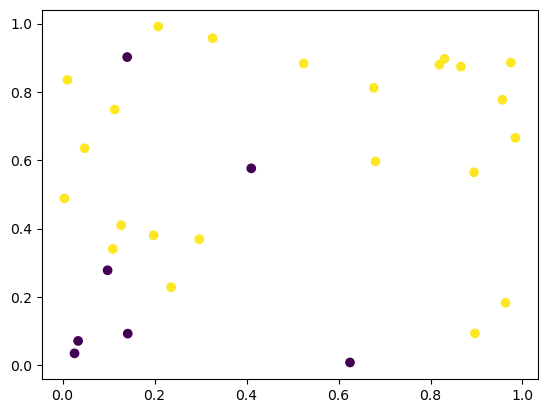

In [212]:
p = Perceptron()

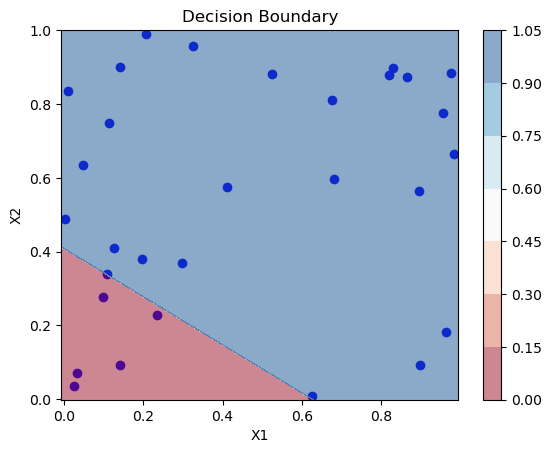

In [213]:
p.train()

In [183]:
p.compute_output([0, 0.57])

1

In [95]:
1.76198492 / 1.72516038

1.021345574838671

In [96]:
b= np.array([1.72516038, 1.76198492])
a= np.array([0.33280502, 0.09589158])
b.dot(a)

0.7431015526840812

In [93]:
p.threshold

0.6999999999999984

In [88]:

p.compute_output([1,0])

0.48988956133500655